In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [17]:
def concentration(T):
    kB = 10**(-5)*8.62
    CEq = np.exp(0.6)*np.exp(-0.66/(kB*T))
    return CEq

T_calc = 930.7111202748607
T = 930
D =  4.801724914986789e-09
Duffusion Coeficient, In Equilibrium by 1V mechanism
9.300871941357172e-09 cm^2/s

T_calc = 890.3243583758112
T = 890
D =  5.01399997134373e-09
Duffusion Coeficient, In Equilibrium by 1V mechanism
6.708317727360239e-09 cm^2/s

T_calc = 849.7789158370822
T = 850
D =  3.160135231244348e-09
Duffusion Coeficient, In Equilibrium by 1V mechanism
2.8204177593671055e-09 cm^2/s



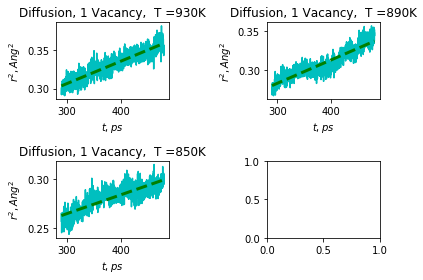

In [18]:
#for reading
rootdir = 'TempDependDiff_3Temp'
#for plotting
iplot = 1
fig, axes = plt.subplots(nrows=2, ncols=2)
Temp = [930, 890, 850]

DFromTemp = []
DV = []

for itemp in Temp:
    #preparing for reading
    #reading from directory 'TempDependDiff_3Temp'
    dirname = rootdir + '/' + (str('%i' %itemp)) + 'KDiffDir'    
    filename = (dirname + '/' + 'log.' + str(itemp))
    listNotNumbers = []
    with open(filename) as f:
        iNumOfLine = 0
        for iline in f:
            try:
                a = [float(x) for x in iline.split()]
                if len(a) < 10:
                    listNotNumbers.append(iNumOfLine)
            except ValueError:
                listNotNumbers.append(iNumOfLine)
            iNumOfLine += 1
    
    #reading file data
    df = pd.read_csv(filename, sep='\s+', header=None, skiprows=listNotNumbers, usecols=np.arange(12))
    names = ['step', 'Lx', 'Ly', 'Lz', 'Press', 'Pxx', 'Pyy', 'Pzz','potEng','totEng', 'msd','temp']
    df.rename(dict(zip(df.columns, names)), inplace='True', axis=1)
    df['volume'] = df['Lx']*df['Ly']*df['Lz']
    df['time'] = df['step']*0.001
#     if iplot == 1:
#         print('Time shape:', df['time'].shape)
    
    #fittng
    func = lambda x, a, b: a*x+b
    start = 100
    stop = len(df['time'])
    xdata = df['time'][start:]
    ydata = df['msd'][start:]
    popt, pcov = curve_fit(func, xdata, ydata)
    D = popt[0]/6/10000 #[D] = cm^2/s
    DV.append(D)
    
    
    #calculation equilib on equil vacancy concentration
    CT = concentration(itemp)
    CSim = 1/4000
    DEq1V = D/CSim*CT
    DFromTemp.append(DEq1V)
    print('T_calc =', np.mean(df['temp']))
    print('T =', itemp)
    print('D = ', D)
    print('Duffusion Coeficient, In Equilibrium by 1V mechanism')
    print(DEq1V, 'cm^2/s')
    print()
    
    #plotting
#     fig, axes = plt.subplots(nrows=2, ncols=2)
    plt.subplot(2,2,iplot)
    iplot += 1
    plt.plot(xdata, ydata, color="c")
    plt.plot(xdata, func(xdata, *popt), 'g--', linewidth=3)
    plt.ylabel('$r^2, Ang^2$')
    plt.xlabel('$t, ps$')
    plt.title('Diffusion, 1 Vacancy,  T =' + str(itemp) + 'K')
    fig.tight_layout()
    
plt.show()

In [19]:
#dfDiff = pd.DataFrame(data={'temp': Temp, 'D': DFromTemp})
#dfDiff.head()
dfDV = pd.DataFrame(data={'temp': Temp, 'D': DV})
dfDV.head()

temp             D
0   930  4.801725e-09
1   890  5.014000e-09
2   850  3.160135e-09

In [20]:
func = lambda x, a, b: a*x + b
dfDV['temp-1'] = 1000/dfDV['temp'] #1000/T, используем принятые обозначения
dfDV['LnD'] = np.log(dfDV['D'])
dfDV.head()

temp             D    temp-1        LnD
0   930  4.801725e-09  1.075269 -19.154291
1   890  5.014000e-09  1.123596 -19.111032
2   850  3.160135e-09  1.176471 -19.572651

In [21]:
#dfDVAr - dots from article
dfDVAr = pd.DataFrame(data={'temp-1': [1.10, 1.253, 1.430], 'D': [2*10**(-5),6*10**(-6), 2*10**(-6)]}) #'temp-1' = 1000/T
dfDVAr['LnD'] = np.log(dfDVAr['D'])

H_mig = 0.36 eV
0.5997385661940924


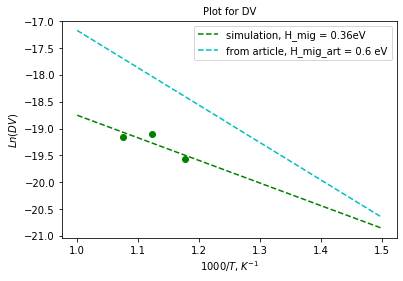

In [38]:
xdata = dfDV['temp-1']
ydata = dfDV['LnD']
xdata1 = dfDVAr['temp-1']
ydata1 = dfDVAr['LnD']
xdataOpt = np.array([1.0, 1.5])
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdataOpt, func(xdataOpt, *popt), 'g--', c='g', label='simulation, H_mig = ' + str(np.round(HMigDV,2))+'eV')
plt.scatter(dfDV['temp-1'], dfDV['LnD'], c='g')

kB = 10**(-5)*8.62
HMigDV = popt[0]*kB*(-1)*10**(3)
plt.xlabel('$1000/T, K^{-1}$')
plt.ylabel('$Ln(DV)$')
plt.title('Plot for DV', fontsize=10)

print('H_mig =', np.round(HMigDV,2) ,'eV')

# plt.scatter(dfDVAr['temp-1'],dfDVAr['LnD'])

popt1, pcov1 = curve_fit(func, xdata1, ydata1)
print(popt1[0]*kB*(-1)*10**(3))
plt.plot(xdataOpt, func(xdataOpt, *popt1) - 7, 'c--', c='c', label='from article, H_mig_art = 0.6 eV')
plt.legend()
plt.savefig('Dv.png', dpi=200)
plt.show()

H_mig + H_vac =  1.02 eV
H_mig = 0.36 eV


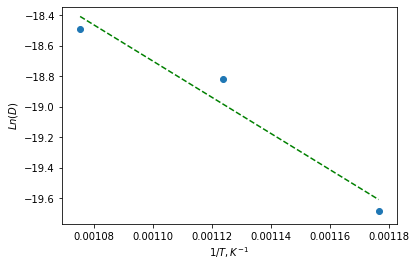

In [10]:
#fittng
func = lambda x, a, b: a*x + b
dfDiff['temp-1'] = 1/dfDiff['temp']
dfDiff['LnD'] = np.log(dfDiff['D'])
xdata = dfDiff['temp-1']
ydata = dfDiff['LnD']
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'g--', c='g')
kB = 10**(-5)*8.62
Q = popt[0]*kB*(-1)
plt.xlabel('$1/T, K^{-1}$')
plt.ylabel('$Ln(D)$')
HVac = 0.66
HMig = Q - HVac
print('H_mig + H_vac = ', np.round(Q,2), 'eV')
print('H_mig =', np.round(HMig,2) ,'eV')
plt.scatter(dfDiff['temp-1'], dfDiff['LnD'])
plt.show()

In [ ]:
plt.plot(df['time'], df['temp'])
np.mean(df['temp'])